In [ ]:
Check original code on Google Colab:
    https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/3D_image_classification.ipynb#scrollTo=MARmmORmDDHf

In [1]:
## Supporting functions ##

import nibabel as nib
from scipy import ndimage
import matplotlib.pyplot as plt
import os
from  skimage import measure

def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


def normalize(volume):
    """Normalize the volume"""
    min = volume.min()
    max = volume.max()
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img,  desired_depth = 64, desired_width = 128, desired_height = 128):
    """Resize across z-axis"""
    # Get current depth
    current_depth = img.shape[0]
    current_width = img.shape[1]
    current_height = img.shape[2]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    ## Rotate
    #img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (depth_factor,width_factor, height_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    return volume


In [2]:
## Reading file and visualize shape ##
img = read_nifti_file('data-sample/CC0001_philips_15_55_M.nii.gz')
print (img.shape)

(171, 256, 256)


In [3]:
## Normalizing images between 0 and 1
print (img.min(),img.max())
img = normalize(img)
print (img.min(),img.max())

0.0 3030.7017822265625
0.0 1.0


(171, 256, 256)


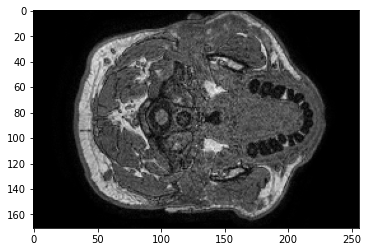

(64, 128, 128)


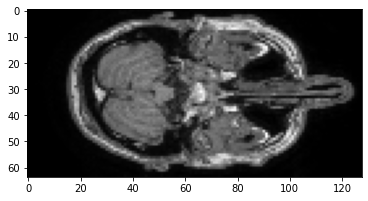

In [5]:
## resizing images and visualizing imageresize_volume(volume)
print (img.shape)
plt.imshow(img[:,:,32], cmap=plt.get_cmap('gray'))
plt.show()

img = resize_volume(img)
print (img.shape)
plt.imshow(img[:,:,32], cmap=plt.get_cmap('gray'))
plt.show()


1.0


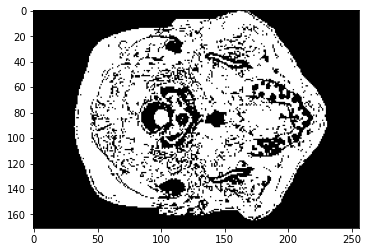

In [4]:
## Binarize image using intensity thresholding ##
print (img.max())
plt.imshow(img[:,:,40]>0.2, cmap=plt.get_cmap('gray'))
plt.show()